# Birds Classification project

## By Fabiha Chowdhury and Marjorie Falcon

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from PIL import Image

## Load data and exploration

In [2]:
data_dir = '../Birds/'

os.listdir(data_dir)

['.ipynb_checkpoints',
 'Bird Classification project.ipynb',
 'images to predict',
 'test',
 'train',
 'valid']

In [3]:
# checking available categories
os.listdir(data_dir +'/train')

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL']

In [4]:
import glob
import pathlib

# number of images
print(len(list(pathlib.Path(data_dir).glob('*/**/*.jpg'))))

3414


In [5]:
bird_img = data_dir+'/train'+'/ABBOTTS BOOBY'+'/001.jpg'

In [6]:
# image dimentions
imread(bird_img).shape

(224, 224, 3)

In [7]:
# create directory path for each dataset
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
validation_dir = os.path.join(data_dir, 'valid')
predict_dir = os.path.join(data_dir, 'images to predict')

In [8]:
batch_size = 32
img_height = 224
img_width = 224
img_size = (img_height, img_width)
img_shape = img_size + (3,)

In [9]:
import tensorflow as tf
import tensorflow.keras as keras

# create training dataset
data_train = keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3208 files belonging to 20 classes.


In [10]:
data_validation = keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 100 files belonging to 20 classes.


In [11]:
# create test dataset
data_test = keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 100 files belonging to 20 classes.


In [12]:
categories = [d.name for d in Path(train_dir).iterdir() if d.is_dir()]
categories

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL']

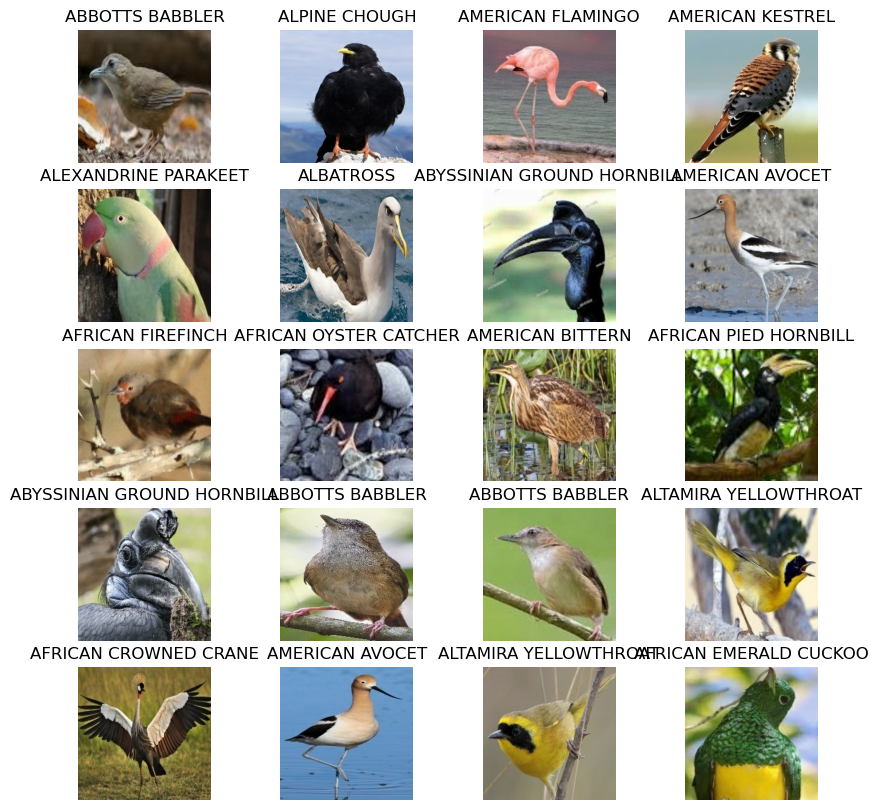

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):
  for i in range(20):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(categories[labels[i]])
    plt.axis("off")

## Pre-trained model Hugging face

In [14]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import torch
import os

# List class folders and images
classes = os.listdir(train_dir)

# Load pre-trained model and image processor
model_name = 'google/vit-base-patch16-224-in21k'
image_processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

In [15]:
def preprocess_image(img_path):
    img = Image.open(img_path).convert('RGB')
    inputs = image_processor(images=img, return_tensors='pt')
    return inputs

In [16]:
def predict_image(img_path):
    inputs = preprocess_image(img_path)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).item()
    return model.config.id2label[predicted_class_idx]

## Predict the Birds to predict

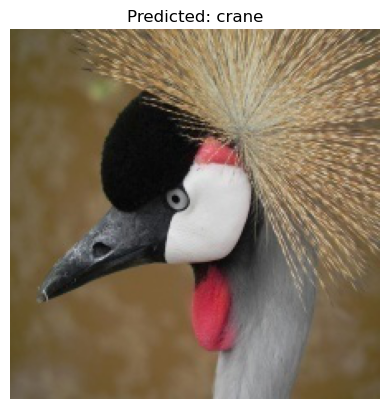

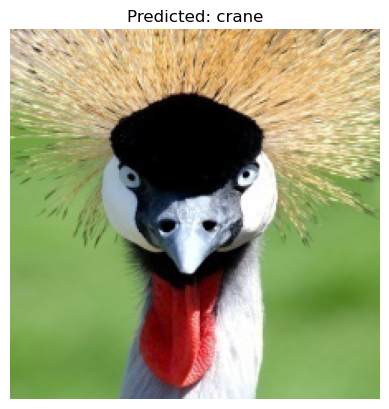

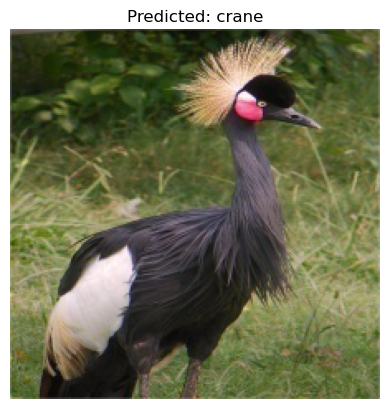

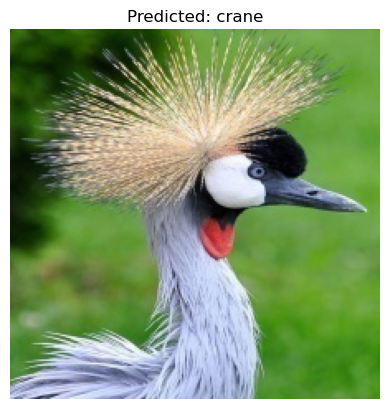

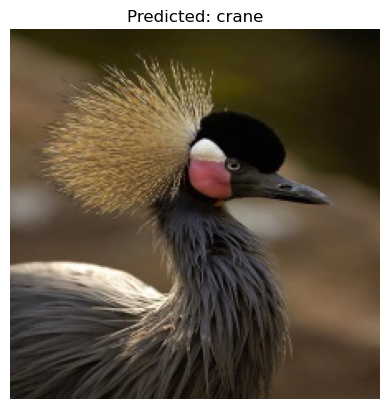

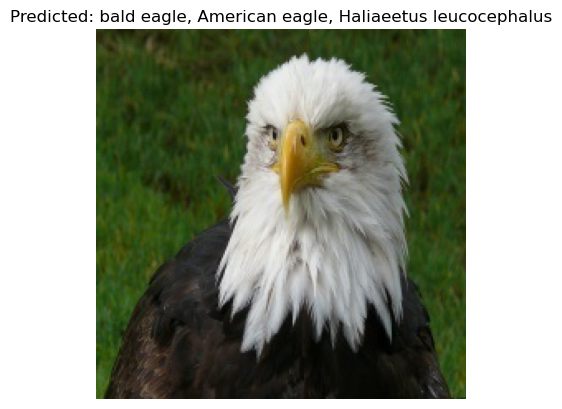

In [22]:
predict_dir = os.path.join(data_dir, 'images to predict')
image_paths = [os.path.join(predict_dir, img) for img in os.listdir(predict_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

for img_path in image_paths:

        prediction = predict_image(img_path)
        img = Image.open(img_path)
        plt.figure()
        plt.imshow(img)
        plt.title(f'Predicted: {prediction}')
        plt.axis('off')
        plt.show()

## Conclusion

With the help of this hugging face pretrained model we were able to correctly predict the birds types.

# Thank you!